<a href="https://colab.research.google.com/github/farimairanbakhsh/MachineLearning2023/blob/main/Chapter1/miniproject3/mini_project3_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1eFUKoKzHdFarSQhMaew4VEYOxiudD6ml

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1eFUKoKzHdFarSQhMaew4VEYOxiudD6ml
To: /content/covid.csv
100% 258/258 [00:00<00:00, 768kB/s]


In [ ]:
data = pd.read_csv('/content/covid.csv')
data

,Fever,Cough,Breathing issues,Infected
0,No,No,No,No
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
5,No,Yes,No,No
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
8,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes


In [ ]:
labels = data['Infected']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9852281360342515

In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [ ]:
entropy(data['Infected'])

0.9852281360342515

In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, label=None, information_gain=None, num_samples=None):
        self.feature = feature
        self.label = label
        self.information_gain = information_gain
        self.num_samples = num_samples
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", information_gain={self.information_gain:.4f}, ' \
                   f'num_samples={self.num_samples}, children={self.children})'
        else:
            return f'LeafNode(label="{self.label}", num_samples={self.num_samples})'

def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0], num_samples=len(data))

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        mode_label = data[target].mode()[0]
        return Node(label=mode_label, num_samples=len(data))

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature, information_gain=gains[max_gain_idx], num_samples=len(data))

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)

    return node


In [ ]:
tree = make_tree(data, 'Infected')
tree

DecisionNode(feature="Breathing issues", information_gain=0.3960, num_samples=14, children={'No': DecisionNode(feature="Fever", information_gain=0.1909, num_samples=6, children={'No': LeafNode(label="No", num_samples=3), 'Yes': DecisionNode(feature="Cough", information_gain=0.0000, num_samples=3, children={'Yes': LeafNode(label="No", num_samples=3)})}), 'Yes': DecisionNode(feature="Fever", information_gain=0.1992, num_samples=8, children={'Yes': LeafNode(label="Yes", num_samples=5), 'No': DecisionNode(feature="Cough", information_gain=0.0000, num_samples=3, children={'Yes': LeafNode(label="Yes", num_samples=3)})})})

In [ ]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

**قسمت ب**

In [ ]:
from sklearn import tree

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1F1gbxwdg2tGMa28tfU_z0ScZhGoTRsMU

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1F1gbxwdg2tGMa28tfU_z0ScZhGoTRsMU
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 19.4MB/s]


In [ ]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((150, 5), (50, 5))

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train_encoded = X_train.copy()  # Assuming X_train is your feature matrix

# Apply label encoding to categorical columns
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train_encoded[column] = label_encoder.fit_transform(X_train[column])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.1)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, random_state=42)

[Text(0.6666666666666666, 0.875, 'x[4] <= 14.829\ngini = 0.71\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.694\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 50.5\ngini = 0.496\nsamples = 33\nvalue = [18, 15, 0, 0, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.38\nsamples = 51\nvalue = [0, 0, 13, 38, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 66]')]

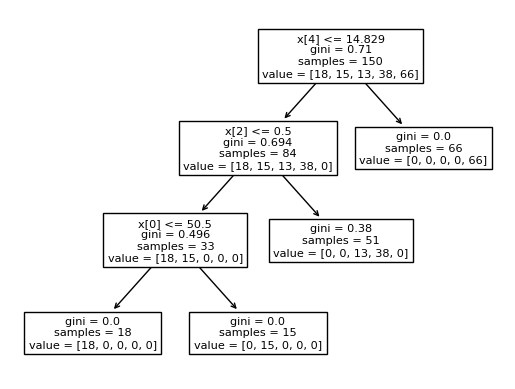

In [ ]:
tree.plot_tree(clf)

In [ ]:
# Assuming you have feature_names defined somewhere
feature_names = X_train.columns.tolist()

# Export text representation of the decision tree
r = tree.export_text(clf, feature_names=feature_names)
print(r)

|--- Na_to_K <= 14.83
|   |--- BP <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|   |--- BP >  0.50
|   |   |--- class: drugX
|--- Na_to_K >  14.83
|   |--- class: drugY



In [ ]:
X_test_encoded = X_test.copy()  # Assuming X_test is your test feature matrix

label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        X_test_encoded[column] = label_encoder.fit_transform(X_test[column])

# Now you can use X_test_encoded and clf.predict() for predictions
predictions = clf.predict(X_test_encoded)
print(clf.score(X_test_encoded, y_test))
print(clf.predict_proba(X_test_encoded))
print(predictions)


0.94
[[0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.25490196 0.74509804 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.     

In [ ]:
i = 1
decision_path = clf.decision_path(X_test_encoded.iloc[[i]])
print(decision_path.toarray())
clf.predict(X_test_encoded.iloc[[i]])

[[1 1 0 0 0 1 0]]


array(['drugX'], dtype=object)

In [ ]:
i = 3
decision_path = clf.decision_path(X_test_encoded.iloc[i:i+1])
print(decision_path.toarray())
clf.predict(X_test_encoded.iloc[i:i+1])


[[1 0 0 0 0 0 1]]


array(['drugY'], dtype=object)

In [ ]:
# Use pandas get_dummies for one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42, ccp_alpha=0.1, criterion='log_loss')

# Now, fit your classifier
clf2.fit(X_train_encoded, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='log_loss', max_depth=4,
                       random_state=42)

[Text(0.6666666666666666, 0.9, 'x[1] <= 14.829\nlog_loss = 2.028\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 0.5\nlog_loss = 1.854\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.3333333333333333, 0.5, 'x[6] <= 0.5\nlog_loss = 0.819\nsamples = 51\nvalue = [0, 0, 13, 38, 0]'),
 Text(0.2222222222222222, 0.3, 'x[7] <= 0.5\nlog_loss = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'log_loss = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'log_loss = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'log_loss = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nlog_loss = 0.994\nsamples = 33\nvalue = [18, 15, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'log_loss = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'log_loss = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.77

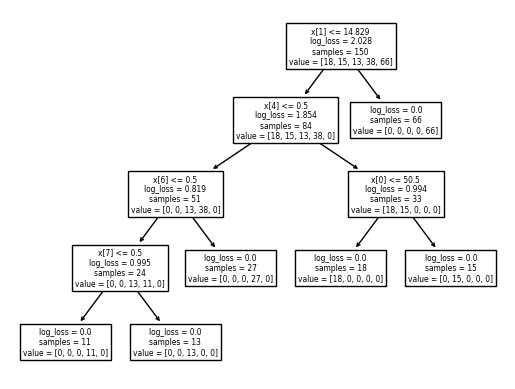

In [ ]:
tree.plot_tree(clf2)

In [ ]:
# Assuming you have feature_names defined somewhere
feature_names2 = X_train_encoded.columns.tolist()

# Export text representation of the decision tree
r = tree.export_text(clf2, feature_names=feature_names2)
print(r)

|--- Na_to_K <= 14.83
|   |--- BP_HIGH <= 0.50
|   |   |--- BP_NORMAL <= 0.50
|   |   |   |--- Cholesterol_HIGH <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Cholesterol_HIGH >  0.50
|   |   |   |   |--- class: drugC
|   |   |--- BP_NORMAL >  0.50
|   |   |   |--- class: drugX
|   |--- BP_HIGH >  0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: drugY



تغییرات در فراپارامتر

[Text(0.5, 0.75, 'x[1] <= 14.829\nlog_loss = 2.028\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.25, 0.25, 'log_loss = 1.854\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.75, 0.25, 'log_loss = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 66]')]

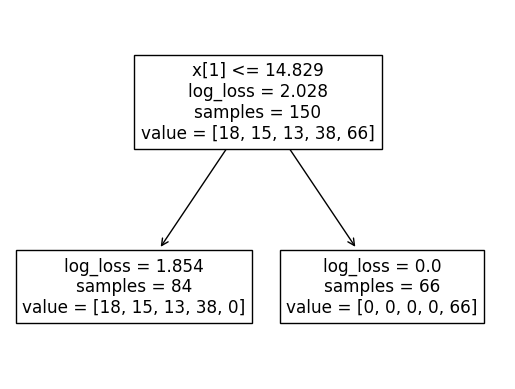

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42, ccp_alpha=0.9, criterion='log_loss')
clf.fit(X_train_encoded, y_train)
tree.plot_tree(clf)

[Text(0.5, 0.75, 'x[1] <= 14.829\nlog_loss = 2.028\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.25, 0.25, 'log_loss = 1.854\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.75, 0.25, 'log_loss = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 66]')]

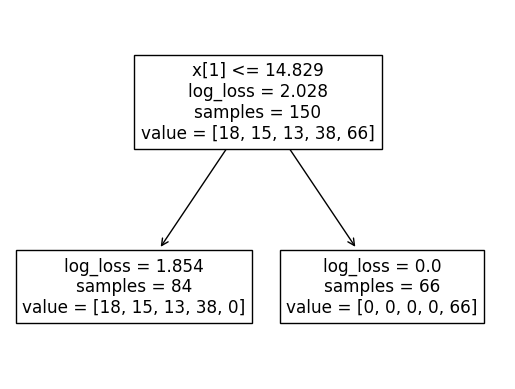

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=7, random_state=42, ccp_alpha=0.9, criterion='log_loss')
clf.fit(X_train_encoded, y_train)
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.9, 'x[1] <= 14.829\nlog_loss = 2.028\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 0.5\nlog_loss = 1.854\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.3333333333333333, 0.5, 'x[6] <= 0.5\nlog_loss = 0.819\nsamples = 51\nvalue = [0, 0, 13, 38, 0]'),
 Text(0.2222222222222222, 0.3, 'x[7] <= 0.5\nlog_loss = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'log_loss = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'log_loss = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'log_loss = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nlog_loss = 0.994\nsamples = 33\nvalue = [18, 15, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'log_loss = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'log_loss = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.77

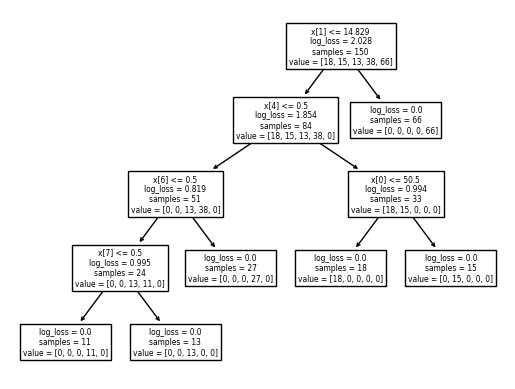

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42, ccp_alpha=0.01, criterion='log_loss')
clf.fit(X_train_encoded, y_train)
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.9, 'x[1] <= 14.829\nlog_loss = 2.028\nsamples = 150\nvalue = [18, 15, 13, 38, 66]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 0.5\nlog_loss = 1.854\nsamples = 84\nvalue = [18, 15, 13, 38, 0]'),
 Text(0.3333333333333333, 0.5, 'x[6] <= 0.5\nlog_loss = 0.819\nsamples = 51\nvalue = [0, 0, 13, 38, 0]'),
 Text(0.2222222222222222, 0.3, 'x[7] <= 0.5\nlog_loss = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'log_loss = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'log_loss = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'log_loss = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nlog_loss = 0.994\nsamples = 33\nvalue = [18, 15, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'log_loss = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'log_loss = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.77

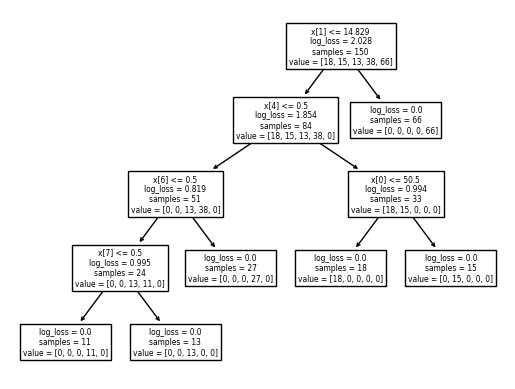

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=7, random_state=42, ccp_alpha=0.01, criterion='log_loss')
clf.fit(X_train_encoded, y_train)
tree.plot_tree(clf)

قسمت ج

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Tc8ryapSrDKtkGadAuhF7dMxst1s3OXu

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1Tc8ryapSrDKtkGadAuhF7dMxst1s3OXu
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 103MB/s]


In [ ]:
led = pd.read_csv('/content/Life Expectancy Data.csv')
led

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
column_to_move = 'Life expectancy '

led[column_to_move] = led.pop(column_to_move)
led

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [ ]:
led.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [ ]:
led.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
led_encoded = led.copy()

# Apply label encoding to categorical columns
for column in led.columns:
    if led[column].dtype == 'object':
        led_encoded[column] = label_encoder.fit_transform(led[column])

In [ ]:
X = led_encoded.iloc[:,0:-1]
y = led_encoded.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1236, 21), (413, 21))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the Decision Tree Regressor
reg = DecisionTreeRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': np.arange(1, 11),
    'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.3, 0.4, 0.001]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Corresponding Cross-Validated Score: {best_score}")


Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9}
Corresponding Cross-Validated Score: 0.9102686936524341


In [ ]:
reg = tree.DecisionTreeRegressor(max_depth=10, ccp_alpha = 0.0, min_samples_split=9, min_samples_leaf=3, max_features='auto')
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=3,
                      min_samples_split=9)

In [ ]:
reg.predict(X_test)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9793558159161025, 0.9234475111932139)